In [1]:
import pandas as pd
import numpy as np
import hashlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
# Uncomment if using .parquet file
# total_barnet = pd.read_parquet('data/clean_df.parquet', engine='pyarrow')

# Uncomment if using saved csv file
total_barnet = pd.read_csv('data/total_barnet.csv')

In [3]:
total_barnet.head()

,Unnamed: 0,crime_id,month,longitude,latitude,location,lsoa_code,lsoa_name,last_outcome_category,ward_code,ward_name
0,0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,2010-12,-0.201877,51.655538,On or near High Street,E01000248,Barnet 001A,None,E05013644,High Barnet
1,1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,2010-12,-0.207853,51.654317,On or near The Avenue,E01000248,Barnet 001A,None,E05013644,High Barnet
2,2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2010-12,-0.202510,51.656348,On or near Bruce Road,E01000248,Barnet 001A,None,E05013644,High Barnet
3,3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,2010-12,-0.206779,51.654768,On or near The Drive,E01000248,Barnet 001A,None,E05013644,High Barnet
4,4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,2010-12,-0.209537,51.655223,On or near Marriott Road,E01000249,Barnet 001B,None,E05013644,High Barnet


In [4]:
total_barnet.shape

(44138, 11)

In [10]:
adjust = total_barnet.drop(columns=['crime_id', 'location', 'lsoa_name', 'last_outcome_category', 'ward_name'])

In [11]:
adjust.head()

,Unnamed: 0,month,longitude,latitude,lsoa_code,ward_code
0,0,2010-12,-0.201877,51.655538,E01000248,E05013644
1,1,2010-12,-0.207853,51.654317,E01000248,E05013644
2,2,2010-12,-0.202510,51.656348,E01000248,E05013644
3,3,2010-12,-0.206779,51.654768,E01000248,E05013644
4,4,2010-12,-0.209537,51.655223,E01000249,E05013644


In [14]:
X = adjust.iloc[:,:1]
Y = adjust.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=1, test_size=0.2)

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_mod = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=1) 
tree_mod.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [16]:
from sklearn.tree import export_text 
tree_rules = export_text(tree_mod, feature_names=list(X_train))
print(tree_rules)

|--- Unnamed: 0 <= 857.50
|   |--- Unnamed: 0 <= 371.00
|   |   |--- class: 2010-12
|   |--- Unnamed: 0 >  371.00
|   |   |--- class: 2011-01
|--- Unnamed: 0 >  857.50
|   |--- Unnamed: 0 <= 2518.00
|   |   |--- Unnamed: 0 <= 2082.50
|   |   |   |--- Unnamed: 0 <= 1668.50
|   |   |   |   |--- Unnamed: 0 <= 1260.50
|   |   |   |   |   |--- class: 2011-02
|   |   |   |   |--- Unnamed: 0 >  1260.50
|   |   |   |   |   |--- class: 2011-03
|   |   |   |--- Unnamed: 0 >  1668.50
|   |   |   |   |--- class: 2011-04
|   |   |--- Unnamed: 0 >  2082.50
|   |   |   |--- class: 2011-05
|   |--- Unnamed: 0 >  2518.00
|   |   |--- Unnamed: 0 <= 2928.50
|   |   |   |--- class: 2011-06
|   |   |--- Unnamed: 0 >  2928.50
|   |   |   |--- Unnamed: 0 <= 6523.00
|   |   |   |   |--- Unnamed: 0 <= 6091.50
|   |   |   |   |   |--- class: 2011-12
|   |   |   |   |--- Unnamed: 0 >  6091.50
|   |   |   |   |   |--- class: 2012-03
|   |   |   |--- Unnamed: 0 >  6523.00
|   |   |   |   |--- Unnamed: 0 <= 9701.50

In [17]:
X_test.iloc[0]

Unnamed: 0    37933
Name: 37933, dtype: int64

In [18]:
tree_mod.predict(X_test.iloc[0].to_numpy().reshape(1,-1))

array(['2013-01'], dtype=object)

In [21]:
tree_mod.predict_proba(X_test[:5])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01088929,
        0.01343013, 0.01154265, 0.01147005, 0.01052632, 0.00980036,
        0.00787659, 0.00878403, 0.00791289, 0.00867514, 0.00965517,
        0.01147005, 0.01281307, 0.0092196 , 0.00852995, 0.00980036,
        0.0091833 , 0.00736842, 0.00675136, 0.00787659, 0.00802178,
        0.00852995, 0.0092559 , 0.01059891, 0.0092922 , 0.01056261,
        0.00889292, 0.00987296, 0.00827586, 0.00874773, 0.00747731,
        0.00747731, 0.00736842, 0.00842105, 0.0108167 , 0.01259528,
        0.00998185, 0.01110708, 0.00947368, 0.00914701, 0.00686025,
        0.0076951 , 0.00700544, 0.00675136, 0.00882033, 0.00624319,
        0.00667877, 0.01019964, 0.00813067, 0.00

In [22]:
print("Training Accuracy: {0:.2f}; test accuracy:{1:.2f}".format(tree_mod.score(X_train, Y_train), 
                                                                tree_mod.score(X_test, Y_test)))

Training Accuracy: 0.11; test accuracy:0.11


In [19]:
# training_data, testing_data = train_test_split(total_barnet, test_size=0.2, random_state=25)



In [6]:
crs = {'init': 'epsg:4326'}
total_barnet.head()

,Unnamed: 0,crime_id,month,longitude,latitude,location,lsoa_code,lsoa_name,last_outcome_category,ward_code,ward_name
0,0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,2010-12,-0.201877,51.655538,On or near High Street,E01000248,Barnet 001A,None,E05013644,High Barnet
1,1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,2010-12,-0.207853,51.654317,On or near The Avenue,E01000248,Barnet 001A,None,E05013644,High Barnet
2,2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2010-12,-0.202510,51.656348,On or near Bruce Road,E01000248,Barnet 001A,None,E05013644,High Barnet
3,3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,2010-12,-0.206779,51.654768,On or near The Drive,E01000248,Barnet 001A,None,E05013644,High Barnet
4,4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,2010-12,-0.209537,51.655223,On or near Marriott Road,E01000249,Barnet 001B,None,E05013644,High Barnet


In [8]:
geometry = [Point(xy) for xy in zip(total_barnet['longitude'], total_barnet['latitude'])]
geometry[:3]

In [9]:
geo_df = gpd.GeoDataFrame(total_barnet, crs=crs, geometry=geometry)
geo_df.head()

,Unnamed: 0,crime_id,month,longitude,latitude,location,lsoa_code,lsoa_name,last_outcome_category,ward_code,ward_name,geometry
0,0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,2010-12,-0.201877,51.655538,On or near High Street,E01000248,Barnet 001A,None,E05013644,High Barnet,POINT (-0.20188 51.65554)
1,1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,2010-12,-0.207853,51.654317,On or near The Avenue,E01000248,Barnet 001A,None,E05013644,High Barnet,POINT (-0.20785 51.65432)
2,2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2010-12,-0.202510,51.656348,On or near Bruce Road,E01000248,Barnet 001A,None,E05013644,High Barnet,POINT (-0.20251 51.65635)
3,3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,2010-12,-0.206779,51.654768,On or near The Drive,E01000248,Barnet 001A,None,E05013644,High Barnet,POINT (-0.20678 51.65477)
4,4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,2010-12,-0.209537,51.655223,On or near Marriott Road,E01000249,Barnet 001B,None,E05013644,High Barnet,POINT (-0.20954 51.65522)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (44138,) + inhomogeneous part.

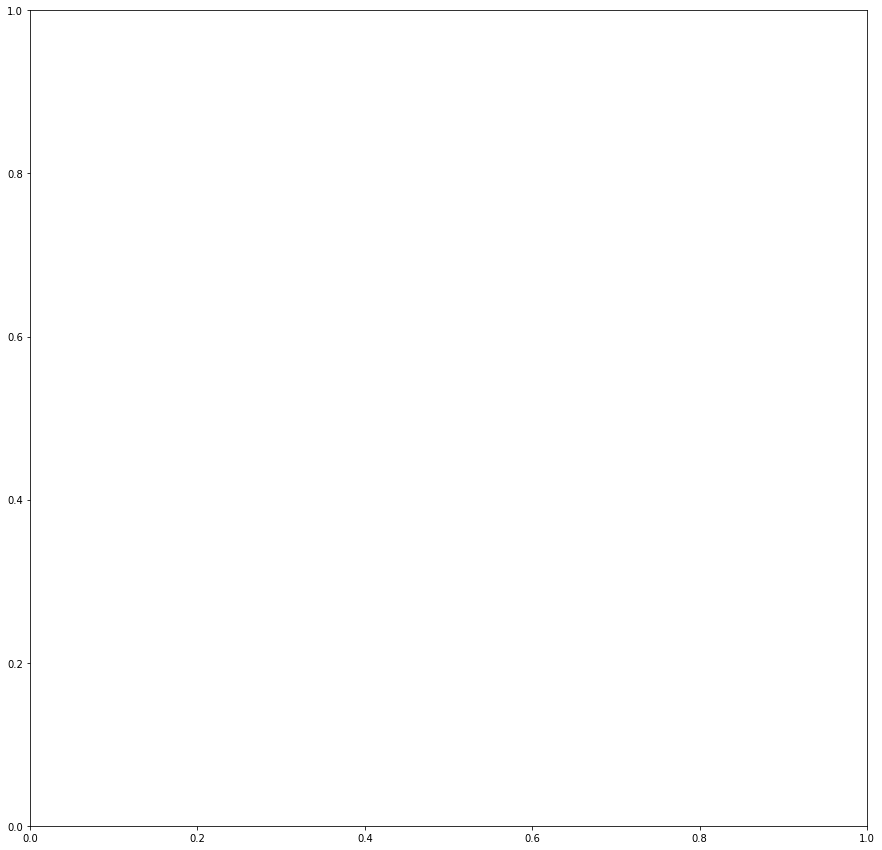

In [12]:
# fig, ax = plt.subplots(figsize=(15,15))
# geo_df[geometry].plot()